In [14]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [15]:
# Number of pairs feature/label.
M = 1000

## No-scaling applied to the features.

In [16]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

#FELIPE: você precisa criar 2 conjuntos distintos, um pra treinamento e outro para validação.

#FELIPE: Cria conjunto de treinamento.
# Input values (features)
x1_t = np.random.randn(M, 1)

x2_t = 10*np.random.randn(M, 1) + 10

# Output values (targets).
y_t = x1_t + x2_t # FELIPE: nesse exercício nós não adicionamos ruído, eu queria que vocês vissem o que escalas diferentes causam na superfície de erro.

# Concatenate both column vectors.
#FELIPE: Você encontra os valores ótimos e treina o algortimo sempre com o conjunto de treinamento o de validação é apenas para verificação do modelo.
X_t = np.c_[x1_t, x2_t]

In [17]:
# Muda semente para que os conjuntos sejam independentes.
np.random.seed(2345)

#FELIPE: Cria conjunto de validação.
# Input values (features)
x1_v = np.random.randn(M, 1)

x2_v = 10*np.random.randn(M, 1) + 10

# Output values (targets).
y_v = x1_v + x2_v

#FELIPE^:concatena para validação.
X_v = np.c_[x1_v, x2_v]

In [18]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X_t).dot(X_t)).dot(np.transpose(X_t).dot(y_t))
yhat = a_opt[0, 0]*x1_t + a_opt[1, 0]*x2_t
Joptimum = (1/M)*np.sum(np.power((y_t - yhat), 2))

In [19]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-22.0, 24.0, N)
a2 = np.linspace(-22.0, 24.0, N)

A1, A2 = np.meshgrid(a1, a2)
# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1_t + A2[iter1][iter2]*x2_t
        J[iter1][iter2] = (1/M)*np.sum( np.square(y_t - yhat)  )

In [20]:
# Batch gradient descendent solution.

# learning rate.
alpha = 0.002
# Maximum number of iterations.
n_iterations = 2000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing training error values.
Jgd_t = np.zeros(n_iterations+1)

# Create array for storing validation error values.
Jgd_v = np.zeros(n_iterations+1)

#FELIPE: Erro com conjunto de treinamento.
Jgd_t[0] = (1/M)*sum(np.power(y_t - X_t.dot(a), 2))

#FELIPE: Erro com conjunto de validação.
Jgd_v[0] = (1/M)*sum(np.power(y_v - X_v.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))
# FELIPE: 2000 iterações e um critério de parada que faça o algoritmo parar quando o erro entre duas épocas consecutivas for menor do que 0.001, ou seja, o algoritmo irá parar se o erro for menor do 0.001 ou se atingir o número máximo de iterações
while iteration < n_iterations and error > 0.001:
    gradients = -2/M * X_t.T.dot(y_t - X_t.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    #FELIPE: Erro com conjunto de treinamento para i-ésima época.
    Jgd_t[iteration+1] = (1/M)*sum(np.power( (y_t - X_t.dot(a)) , 2))
    #FELIPE: Erro com conjunto de validação para i-ésima época.
    Jgd_v[iteration+1] = (1/M)*sum(np.power( (y_v - X_v.dot(a)) , 2))
    error = np.abs(Jgd_t[iteration+1] - Jgd_t[iteration])
    iteration = iteration + 1

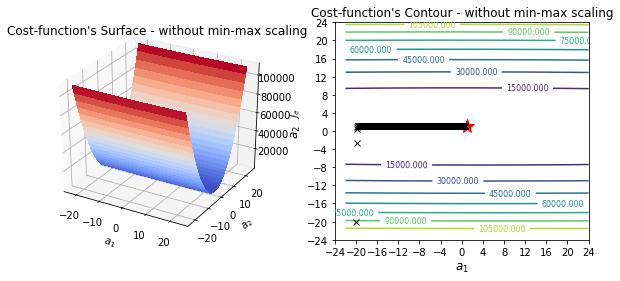

In [21]:
#FELIPE: Aqui você plota a superfície de erro sem nenhum escalonamento.

# Plot cost-function surface.
fig = plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - without min-max scaling')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=8)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
#FELIPE: plote o histórico dos pesos.
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=12)
plt.ylabel('$a_2$', fontsize=12)
plt.title('Cost-function\'s Contour - without min-max scaling')
ax.set_xticks(np.arange(-24, 25, step=4.0))
ax.set_yticks(np.arange(-24, 25, step=4.0))

#Show the plot.
plt.show()

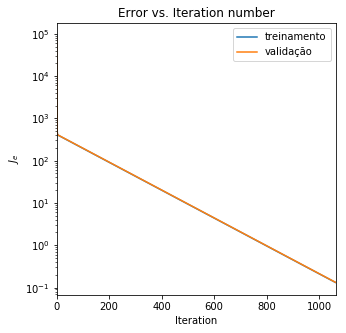

In [22]:
#FELIPE: plote o número de epocas para o caso sem escalonamento.
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd_t[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()
#plt.savefig("Error_vs_iteration_bgd_Execise_8A.png", dpi=600)

In [ ]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

## Apply Min-Max scaling to the features.

In [32]:
#FELIPE: Agora você vai escalonar.

# Import Class MinMaxScaler from module Preprocessing of library sklearn responsible for normalizing the data.
from sklearn.preprocessing import MinMaxScaler

# Instantiate a Standard scaler.
scaler = MinMaxScaler()

# Concatenate both column vectors.
X_t = np.c_[x1_t, x2_t]

# Scaling the features.
scaled_X_t = scaler.fit_transform(X_t)

# Concatenate both column vectors.
X_v = np.c_[x1_v, x2_v]

#FELIPE: Não se esqueça que o conjunto de validação é normalizado com os valores mín-máx encontrados para o conjunto de treinamento, por isso eu uso só o método 'transform' e não o 'fit_transform'.
scaled_X_v = scaler.transform(X_v)

In [33]:
#FELIPE: calcule o novo ponto ótimo com os atributos já escalonados.
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(scaled_X_t).dot(scaled_X_t)).dot(np.transpose(scaled_X_t).dot(y_t))
yhat = a_opt[0, 0]*scaled_X_t[:,0] + a_opt[1, 0]*scaled_X_t[:,1]
Joptimum = (1/M)*np.sum(np.power((y_t - yhat), 2))

In [58]:
N = 25
a1 = np.linspace(-22.0, 44.0, N)
a2 = np.linspace(-22.0, 44.0, N)

A1, A2 = np.meshgrid(a1, a2)

x1_t_scaled = scaled_X_t[0:M,0]
x2_t_scaled = scaled_X_t[0:M,1]

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1_t_scaled + A2[iter1][iter2]*x2_t_scaled
        J[iter1][iter2] = (1/M)*np.sum(np.square(y_t - yhat))

In [59]:
#FELIPE: Agora você roda oalgortimo novamente, mas desta vez com os atributos escalonados.

# Batch gradient descendent solution.

# learning rate.
alpha = 0.7
# Maximum number of iterations.
n_iterations = 2000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing training error values.
Jgd_t = np.zeros(n_iterations+1)

# Create array for storing validation error values.
Jgd_v = np.zeros(n_iterations+1)

#FELIPE: Erro com conjunto de treinamento.
Jgd_t[0] = (1/M)*sum(np.power(y_t - scaled_X_t.dot(a), 2))

#FELIPE: Erro com conjunto de validação.
Jgd_v[0] = (1/M)*sum(np.power(y_v - scaled_X_v.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))
# FELIPE: 2000 iterações e um critério de parada que faça o algoritmo parar quando o erro entre duas épocas consecutivas for menor do que 0.001, ou seja, o algoritmo irá parar se o erro for menor do 0.001 ou se atingir o número máximo de iterações
while iteration < n_iterations and error > 0.001:
    gradients = -2/M * scaled_X_t.T.dot(y_t - scaled_X_t.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    #FELIPE: Erro com conjunto de treinamento para i-ésima época.
    Jgd_t[iteration+1] = (1/M)*sum(np.power( (y_t - scaled_X_t.dot(a)) , 2))
    #FELIPE: Erro com conjunto de validação para i-ésima época.
    Jgd_v[iteration+1] = (1/M)*sum(np.power( (y_v - scaled_X_v.dot(a)) , 2))
    error = np.abs(Jgd_t[iteration+1] - Jgd_t[iteration])
    iteration = iteration + 1

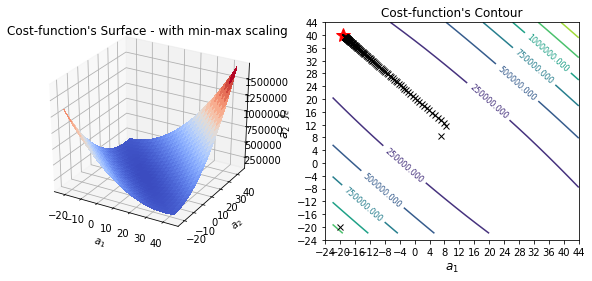

In [60]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - with min-max scaling')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=8)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=12)
plt.ylabel('$a_2$', fontsize=12)
plt.title('Cost-function\'s Contour')
ax.set_xticks(np.arange(-24, 48, step=4.0))
ax.set_yticks(np.arange(-24, 48, step=4.0))

#Show the plot.
plt.show()

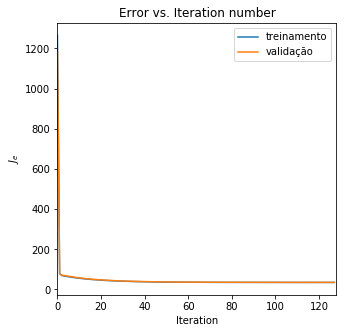

In [61]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd_t[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
plt.xlim((0, iteration))
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()
#plt.savefig("Error_vs_iteration_bgd_Execise_8A.png", dpi=600)

In [62]:
#FELIPE: Imprima os novos valores, agora com escalonamento.

# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

a1_opt: -19.285961773336567
a2_opt: 40.055824807549754
a1_gd: -18.70177358949212
a2_gd: 39.46216452542551
